In [1]:
from S_Matrix_env import*
import matplotlib.pyplot as plt
import copy
from numpy import log10, linspace, inf

## String

String Amplitude:

\begin{equation}
M_{\text{string}}(s, t) = \frac{\Gamma(-s) \Gamma(-t) \Gamma(s + t)}{\Gamma(s + 1)\Gamma(t + 1)\Gamma(- s - t + 1)}
\end{equation}

In [2]:
Constrained_k = [5 + i for i in range(0, 20)]

In [21]:
# String spectrun (truncated) with some states removed
String_Spec_truncate_1 = {
0: [{'m': sqrt(1), 'cl': 1}, {'m': sqrt(2), 'cl': 1/12}, {'m': sqrt(4), 'cl': 107/15120}],
2: [{'m': sqrt(2), 'cl': 1/6}, {'m': sqrt(3), 'cl': 5/84},  {'m': sqrt(4), 'cl': 13/504}, {'m': sqrt(5), 'cl': 745/57024}],
4: [{'m': sqrt(3), 'cl': 9/280}, {'m': sqrt(4), 'cl': 76/3465}, {'m': sqrt(5), 'cl': 565/41184}],
6: [{'m': sqrt(4), 'cl': 16/2079}, {'m': sqrt(5), 'cl': 3125/399168}],
8: [{'m': sqrt(5), 'cl': 3125/1482624}]
}

String_truncate_1 = S_Matrix(String_Spec_truncate_1, String_Spec_truncate_1, Constrained_k)
String_truncate_1.Reward()

-0.009525741697428883

In [22]:
String_truncate_1.data_frame_form()

,m^2 = 1,m^2 = 2,m^2 = 3,m^2 = 4,m^2 = 5
0,1.0,0.083333,NaN,0.007077,NaN
2,NaN,0.166667,0.059524,0.025794,0.013065
4,NaN,NaN,0.032143,0.021934,0.013719
6,NaN,NaN,NaN,0.007696,0.007829
8,NaN,NaN,NaN,NaN,0.002108


In [23]:
# String spectrum truncated at spin 8
String_Spec_truncate_2 = {
0: [{'m': sqrt(1), 'cl': 1}, {'m': sqrt(2), 'cl': 1/12}, {'m': sqrt(3), 'cl': 7/360}, {'m': sqrt(4), 'cl': 107/15120}, {'m': sqrt(5), 'cl': 5951/1814400}],
2: [{'m': sqrt(2), 'cl': 1/6}, {'m': sqrt(3), 'cl': 5/84},  {'m': sqrt(4), 'cl': 13/504}, {'m': sqrt(5), 'cl': 745/57024}],
4: [{'m': sqrt(3), 'cl': 9/280}, {'m': sqrt(4), 'cl': 76/3465}, {'m': sqrt(5), 'cl': 565/41184}],
6: [{'m': sqrt(4), 'cl': 16/2079}, {'m': sqrt(5), 'cl': 3125/399168}],
8: [{'m': sqrt(5), 'cl': 3125/1482624}]
}

String_truncate_2 = S_Matrix(String_Spec_truncate_2, String_Spec_truncate_2, Constrained_k)
String_truncate_2.Reward()

-0.009525741697428883

In [87]:
String_truncate_2.data_frame_form()

,m^2 = 1,m^2 = 2,m^2 = 3,m^2 = 4,m^2 = 5
0,1.0,0.083333,0.019444,0.007077,0.003280
2,NaN,0.166667,0.059524,0.025794,0.013065
4,NaN,NaN,0.032143,0.021934,0.013719
6,NaN,NaN,NaN,0.007696,0.007829
8,NaN,NaN,NaN,NaN,0.002108


## Training

In [6]:
# Code for extracting improv history from training code output

class Improv_Hist:

    def __init__(self, file_name):

        self.file_name = file_name
        self.hist = self.Data_to_List()
        
    
    def Data_to_List(self):

        string_list = []

        Step = 'Step'
        Best_Reward = 'Best_Reward'
        Guess_Mode = 'Guess_Mode'
        left_paran_met = 0

        with open(self.file_name) as f:

            for i, line in enumerate(f.readlines()):


                if line[0] != '|' and line[0] != '-':
                    
                    line = line.removesuffix('\n')
                    #print('line:', type(line))

                    if 'S' in line:
                        string_list.append( eval( '{' + line + '}') )
                    
                    elif '[' in line:
                        
                        left_paran_met += 1
                        if left_paran_met % 2 == 1:
                            string_list.append(line)

                    else:
                        if left_paran_met % 2 == 1:
                            string_list[-1] += ' '
                            string_list[-1] += line
                
                
                if ']' in string_list[-1]:
                    
                    #print('] True', type(string_list[-1]) )

                    string_list[-1] = string_list[-1].split(' ')

                    while '' in string_list[-1]:
                        string_list[-1].remove('')
                    
                    string_list[-1] = eval(','.join( string_list[-1] ))
        

        return string_list
    

    def All_Reward(self):

        rew_list = [data['Best_Reward'] for data in self.hist[::2]]

        return rew_list
    
    
    def Model(self, model):
        
        tmp_model = copy.deepcopy(model)
        tmp_model.Update_Spec_with_new_spec(self.hist[-1])
        return tmp_model



In [7]:
# The 3 training results ( start from the mass and spin spectrum of the truncated string spectrum )
# (best 1 from String_Spec_truncate_1) 
# (best 2 & 3 from String_Spec_truncate_2))

best_1 = Improv_Hist('S_Matrix_Trained_Best_1.txt')
best_2 = Improv_Hist('S_Matrix_Trained_Best_2.txt')
best_3 = Improv_Hist('S_Matrix_Trained_Best_3.txt')

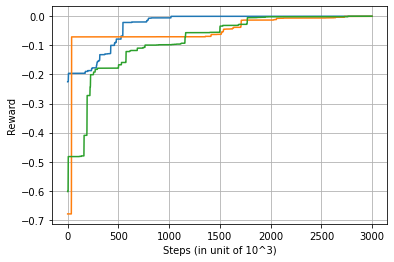

In [11]:
# Plot improve history (3 million steps)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

ax.plot(array(best_1.All_Reward()))
ax.plot(array(best_2.All_Reward()))
ax.plot(array(best_3.All_Reward()))
ax.grid(True)
ax.set_xlabel('Steps (in unit of 10^3)')
ax.set_ylabel('Reward')
plt.show()

In [12]:
Mod_1 = best_1.Model(String_truncate_1)
Mod_2 = best_2.Model(String_truncate_2)
Mod_3 = best_3.Model(String_truncate_2)

In [24]:
# The reward from the 3 training 
# Some coupling are turned off during the training, so the resulting spectrum is not the string spectrum

print(f'String_1_Analytic: {String_truncate_1.Reward()}')
print(f'String_2_Analytic: {String_truncate_2.Reward()}')
print(f'Best_1: {Mod_1.Reward()}')
print(f'Best_2: {Mod_2.Reward()}')
print(f'Best_3: {Mod_3.Reward()}')

String_1_Analytic: -0.009525741697428883
String_2_Analytic: -0.009525741697428883
Best_1: -0.001826766496627762
Best_2: -0.0003077508746693069
Best_3: -5.1769170366519915e-05


In [26]:
# Result from the 1st training
print(f'Best_1: {Mod_1.Reward()}')
Mod_1.data_frame_form()

Best_1: -0.001826766496627762


,m^2 = 1,m^2 = 2,m^2 = 3,m^2 = 4,m^2 = 5
0,1.0,0.0,0.593201,0.962792,NaN
2,NaN,NaN,0.000000,0.000000,0.975358
4,NaN,NaN,NaN,0.000000,0.000000
6,NaN,NaN,NaN,NaN,0.003932
8,NaN,NaN,NaN,NaN,NaN


In [27]:
print(f'Best_2: {Mod_2.Reward()}')
Mod_2.data_frame_form()

Best_2: -0.0003077508746693069


,m^2 = 1,m^2 = 2,m^2 = 3,m^2 = 4,m^2 = 5
0,1.0,0.76914,0.006385,0.016290,0.193960
2,NaN,0.00000,0.731427,0.990793,0.947001
4,NaN,NaN,0.007189,0.027477,0.142046
6,NaN,NaN,NaN,0.000000,0.028768
8,NaN,NaN,NaN,NaN,0.002797


In [28]:
print(f'Best_3: {Mod_3.Reward()}')
Mod_3.data_frame_form()

Best_3: -5.1769170366519915e-05


,m^2 = 1,m^2 = 2,m^2 = 3,m^2 = 4,m^2 = 5
0,1.0,1.00000,1.000000,0.011833,0.006027
2,NaN,0.00216,0.009352,0.018221,0.547921
4,NaN,NaN,0.000000,0.000000,0.079236
6,NaN,NaN,NaN,0.000000,0.000000
8,NaN,NaN,NaN,NaN,0.000319


In [29]:
print(String_truncate_2.Reward())
String_truncate_2.data_frame_form()

-0.009525741697428883


,m^2 = 1,m^2 = 2,m^2 = 3,m^2 = 4,m^2 = 5
0,1.0,0.083333,0.019444,0.007077,0.003280
2,NaN,0.166667,0.059524,0.025794,0.013065
4,NaN,NaN,0.032143,0.021934,0.013719
6,NaN,NaN,NaN,0.007696,0.007829
8,NaN,NaN,NaN,NaN,0.002108


### Make Plots

In [92]:
def To_Dict(mass, c_coeff):
    return {'m': mass, 'cl': c_coeff}

#### Load CSV

In [93]:
string_spec = pd.read_csv("String_Spec_1.csv")

new_spec_dict = {}
rand_spec_dict = {}
max_n = 9
max_spin = (max_n - 1) * 2

for spec in string_spec.iloc:
    
    
    if int(spec['Spin']) > max_spin:
        break
    
    if int(spec['Spin']) in new_spec_dict:

        if int(spec['n']) <= max_n:
            new_spec_dict[int(spec['Spin'])] += [To_Dict(sqrt(int(spec['n'])), spec['cl'])]
            
    
    else:

        if int(spec['n']) <= max_n:
            new_spec_dict[int(spec['Spin'])] = [To_Dict(sqrt(int(spec['n'])), spec['cl'])]
        


##################################################################################################################################################################
String_1_New = S_Matrix(new_spec_dict, new_spec_dict, Constrained_k)

Accumulation Point Amplitude:

\begin{equation}
M_{\text{acc}}(s, t) = \frac{1}{(s - 1)(t - 1)(- s - t - 1)}
\end{equation}

In [94]:
acc_spec = pd.read_csv("Acc_Spec_1.csv")

acc_spec_dict = {}
max_spin = 800
max_n = 400

for spec in acc_spec.iloc:
    
    
    if int(spec['Spin']) > max_spin:
        break
    
    if int(spec['Spin']) in acc_spec_dict:

        if int(spec['n']) <= max_n:
            acc_spec_dict[int(spec['Spin'])] += [To_Dict(sqrt(int(spec['n'])), spec['cl'])]
    
    else:

        if int(spec['n']) <= max_n:
            acc_spec_dict[int(spec['Spin'])] = [To_Dict(sqrt(int(spec['n'])), spec['cl'])]

##################################################################################################################################################################
Accumulation = S_Matrix(acc_spec_dict, acc_spec_dict, Constrained_k)

In [95]:
def n_s_Reward(n, s, spec_df, Constraint_k = Constrained_k):

    tmp_spec_dict = {}

    max_spin = s
    max_n = n

    for spec in spec_df.iloc:
        
        
        if int(spec['Spin']) > max_spin:
            break
        
        if int(spec['Spin']) in tmp_spec_dict:

            if int(spec['n']) <= max_n:
                tmp_spec_dict[int(spec['Spin'])] += [To_Dict(sqrt(int(spec['n'])), spec['cl'])]
        
        else:

            if int(spec['n']) <= max_n:
                tmp_spec_dict[int(spec['Spin'])] = [To_Dict(sqrt(int(spec['n'])), spec['cl'])]
    
    Theory = S_Matrix(tmp_spec_dict, tmp_spec_dict, Constraint_k)
    
    return Theory.Reward()

In [96]:
n_max_list_1D = [n for n in range(2, 101)]
s_max_list_1D = [int( 2 * (n - 1) ) for n in n_max_list_1D]
reward_list_1D = array([n_s_Reward(n, int( 2 * (n - 1) ), string_spec) for n in n_max_list_1D])

In [103]:
reward_list_1D_2 = array([n_s_Reward(n, int( 2 * (n - 1) ), string_spec, [5 + i for i in range(0, 6)]) for n in n_max_list_1D])

In [104]:
acc_reward_list_1D_2 = array([n_s_Reward(1, s, acc_spec, [5 + i for i in range(0, 6)]) for s in s_max_list_1D])

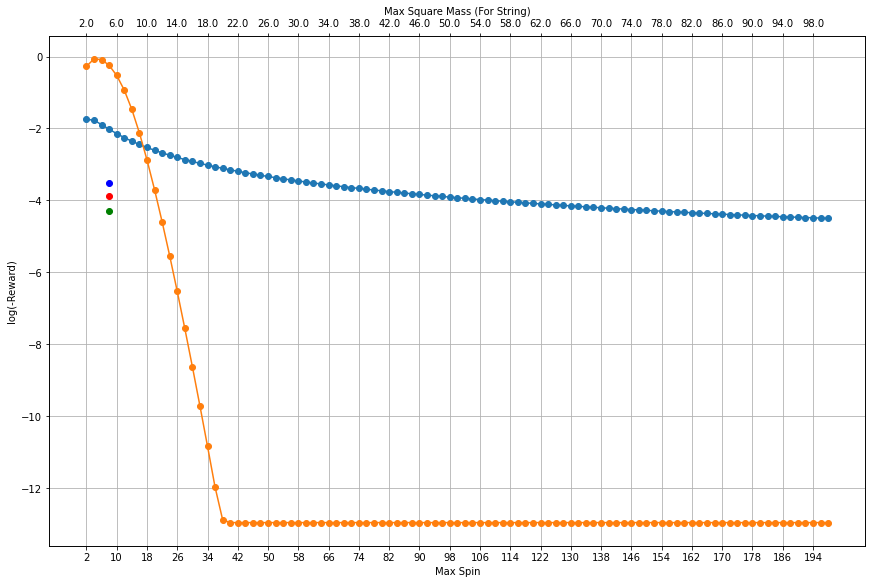

In [106]:
fig2, ax_2 = plt.subplots(constrained_layout=True)

ax_2.plot(s_max_list_1D, log10(-reward_list_1D), '-o')
ax_2.plot(s_max_list_1D, log10(-acc_reward_list_1D_2), '-o')
ax_2.plot(8, log10(- Mod_1.Reward()), 'or')
ax_2.plot(8, log10(- Mod_2.Reward()), 'ob')
ax_2.plot(8, log10(- Mod_3.Reward()), 'og')
ax_2.grid(True)
ax_2.set_xlabel('Max Spin')
ax_2.set_ylabel('log(-Reward)')
ax_2.set_xticks(s_max_list_1D[::4])

ax_s = ax_2.twiny()
ax_s.set_xticks(ax_2.get_xticks())
ax_s.set_xbound(ax_2.get_xbound())
ax_s.set_xticklabels(1 + array(s_max_list_1D[::4])/2)
ax_s.set_xlabel('Max Square Mass (For String)')


plt.rcParams["figure.figsize"] = (12, 8)

plt.show()

In [148]:
n_max_list = [n for n in range(2, 51)]
s_max_list = [s for s in range(2, 51, 2)]
reward_list = [[-inf if spin > 2 * (n - 1) else n_s_Reward(n, spin, string_spec) for n in n_max_list] for spin in s_max_list]

In [149]:
pts_list = [ [n, spin] for n in n_max_list for spin in s_max_list ]

In [150]:
spin = linspace(2, 50, 100)
mass_squared = spin/2 + 1

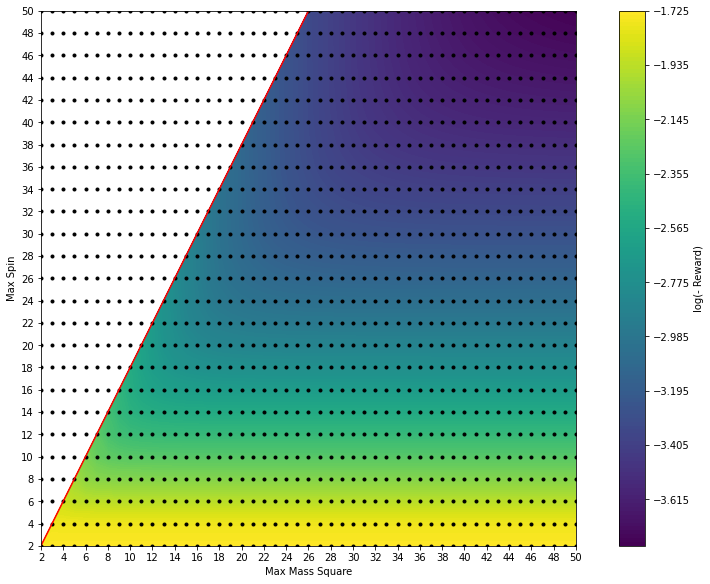

In [152]:
fig, ax = plt.subplots(constrained_layout=True)
data = ax.contourf(n_max_list, s_max_list, log10( -array(reward_list) ), levels = 200)
N, S = array(pts_list).T
ax.plot(N, S, 'ok', ms = 3)
plt.xticks(n_max_list[::2])
plt.yticks(s_max_list)
plt.plot(mass_squared, spin, 'r')
ax.set_xlabel('Max Mass Square')
ax.set_ylabel('Max Spin')
ax.set_aspect(1)
label_bar = fig.colorbar(data)
label_bar.ax.set_ylabel('log(- Reward)')
plt.rcParams["figure.figsize"] = (12, 8)
plt.show()